In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, roc_auc_score, plot_roc_curve, f1_score

In [2]:
alf_df = pd.read_excel('ALF_Data.xlsx')
alf_df

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65,M,east,56.0,162.1,21.31,0.0,83.6,135.0,71.0,...,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,36,M,south,60.2,162.2,22.88,0.0,76.6,96.0,52.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,66,M,east,83.9,162.5,31.77,1.0,113.2,115.0,57.0,...,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,54,M,east,69.4,160.5,26.94,0.0,77.9,110.0,57.0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,63,M,north,73.1,159.2,28.84,0.0,89.3,132.0,73.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780,35,F,east,70.0,171.5,23.80,0.0,87.5,114.0,76.0,...,0.0,1,0.0,1,0.0,1,0.0,0.0,0.0,NaN
8781,66,F,north,102.0,180.7,31.24,1.0,113.2,117.0,72.0,...,0.0,0,1.0,0,0.0,1,0.0,0.0,0.0,NaN
8782,37,F,south,84.4,186.0,24.40,0.0,93.6,144.0,82.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,NaN
8783,39,F,east,92.1,184.8,26.97,0.0,98.2,121.0,75.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,NaN


In [3]:
alf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     8785 non-null   int64  
 1   Gender                  8785 non-null   object 
 2   Region                  8785 non-null   object 
 3   Weight                  8591 non-null   float64
 4   Height                  8594 non-null   float64
 5   Body Mass Index         8495 non-null   float64
 6   Obesity                 8495 non-null   float64
 7   Waist                   8471 non-null   float64
 8   Maximum Blood Pressure  8481 non-null   float64
 9   Minimum Blood Pressure  8409 non-null   float64
 10  Good Cholesterol        8768 non-null   float64
 11  Bad Cholesterol         8767 non-null   float64
 12  Total Cholesterol       8769 non-null   float64
 13  Dyslipidemia            8785 non-null   int64  
 14  PVD                     8785 non-null   

In [4]:
alf_df.isna().sum()

Age                          0
Gender                       0
Region                       0
Weight                     194
Height                     191
Body Mass Index            290
Obesity                    290
Waist                      314
Maximum Blood Pressure     304
Minimum Blood Pressure     376
Good Cholesterol            17
Bad Cholesterol             18
Total Cholesterol           16
Dyslipidemia                 0
PVD                          0
Physical Activity           10
Education                   20
Unmarried                  452
Income                    1161
Source of Care               0
PoorVision                 563
Alcohol Consumption          0
HyperTension                80
Family  HyperTension         0
Diabetes                     2
Family Diabetes              0
Hepatitis                   22
Family Hepatitis             6
Chronic Fatigue             35
ALF                       2785
dtype: int64

In [5]:
alf_df.describe()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
count,8785.000000,8591.000000,8594.000000,8495.000000,8495.000000,8471.000000,8481.000000,8409.000000,8768.000000,8767.000000,...,8222.000000,8785.000000,8705.000000,8785.000000,8783.000000,8785.000000,8763.00000,8779.000000,8750.000000,6000.000000
mean,49.349915,79.100198,167.028124,28.296022,0.315951,96.845178,125.832213,71.516827,51.822536,152.587544,...,0.063610,0.304041,0.402412,0.233238,0.111351,0.311781,0.06653,0.020503,0.029029,0.077333
std,18.831309,19.406975,10.103450,6.184846,0.464921,15.101170,21.046860,12.672351,15.789131,42.976096,...,0.244071,0.460026,0.490412,0.422917,0.314585,0.463247,0.24922,0.141723,0.167896,0.267142
min,20.000000,25.600000,130.400000,12.040000,0.000000,58.500000,72.000000,10.000000,8.000000,27.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,33.000000,65.400000,159.700000,24.080000,0.000000,86.200000,111.000000,64.000000,41.000000,123.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,47.000000,76.800000,166.600000,27.360000,0.000000,96.300000,122.000000,72.000000,49.000000,149.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,65.000000,89.550000,174.200000,31.380000,1.000000,106.100000,136.000000,79.000000,60.000000,177.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
max,85.000000,193.300000,200.100000,66.440000,1.000000,173.400000,233.000000,132.000000,160.000000,684.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [6]:
alf_df = alf_df.dropna(subset = ['ALF'])

In [7]:
alf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     6000 non-null   int64  
 1   Gender                  6000 non-null   object 
 2   Region                  6000 non-null   object 
 3   Weight                  5867 non-null   float64
 4   Height                  5861 non-null   float64
 5   Body Mass Index         5794 non-null   float64
 6   Obesity                 5794 non-null   float64
 7   Waist                   5785 non-null   float64
 8   Maximum Blood Pressure  5794 non-null   float64
 9   Minimum Blood Pressure  5748 non-null   float64
 10  Good Cholesterol        5992 non-null   float64
 11  Bad Cholesterol         5992 non-null   float64
 12  Total Cholesterol       5994 non-null   float64
 13  Dyslipidemia            6000 non-null   int64  
 14  PVD                     6000 non-null   

In [8]:
alf_df.isna().sum()

Age                         0
Gender                      0
Region                      0
Weight                    133
Height                    139
Body Mass Index           206
Obesity                   206
Waist                     215
Maximum Blood Pressure    206
Minimum Blood Pressure    252
Good Cholesterol            8
Bad Cholesterol             8
Total Cholesterol           6
Dyslipidemia                0
PVD                         0
Physical Activity           8
Education                  15
Unmarried                 301
Income                    792
Source of Care              0
PoorVision                376
Alcohol Consumption         0
HyperTension               53
Family  HyperTension        0
Diabetes                    1
Family Diabetes             0
Hepatitis                  13
Family Hepatitis            3
Chronic Fatigue            26
ALF                         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FF7D905B0>,
      dtype=object)

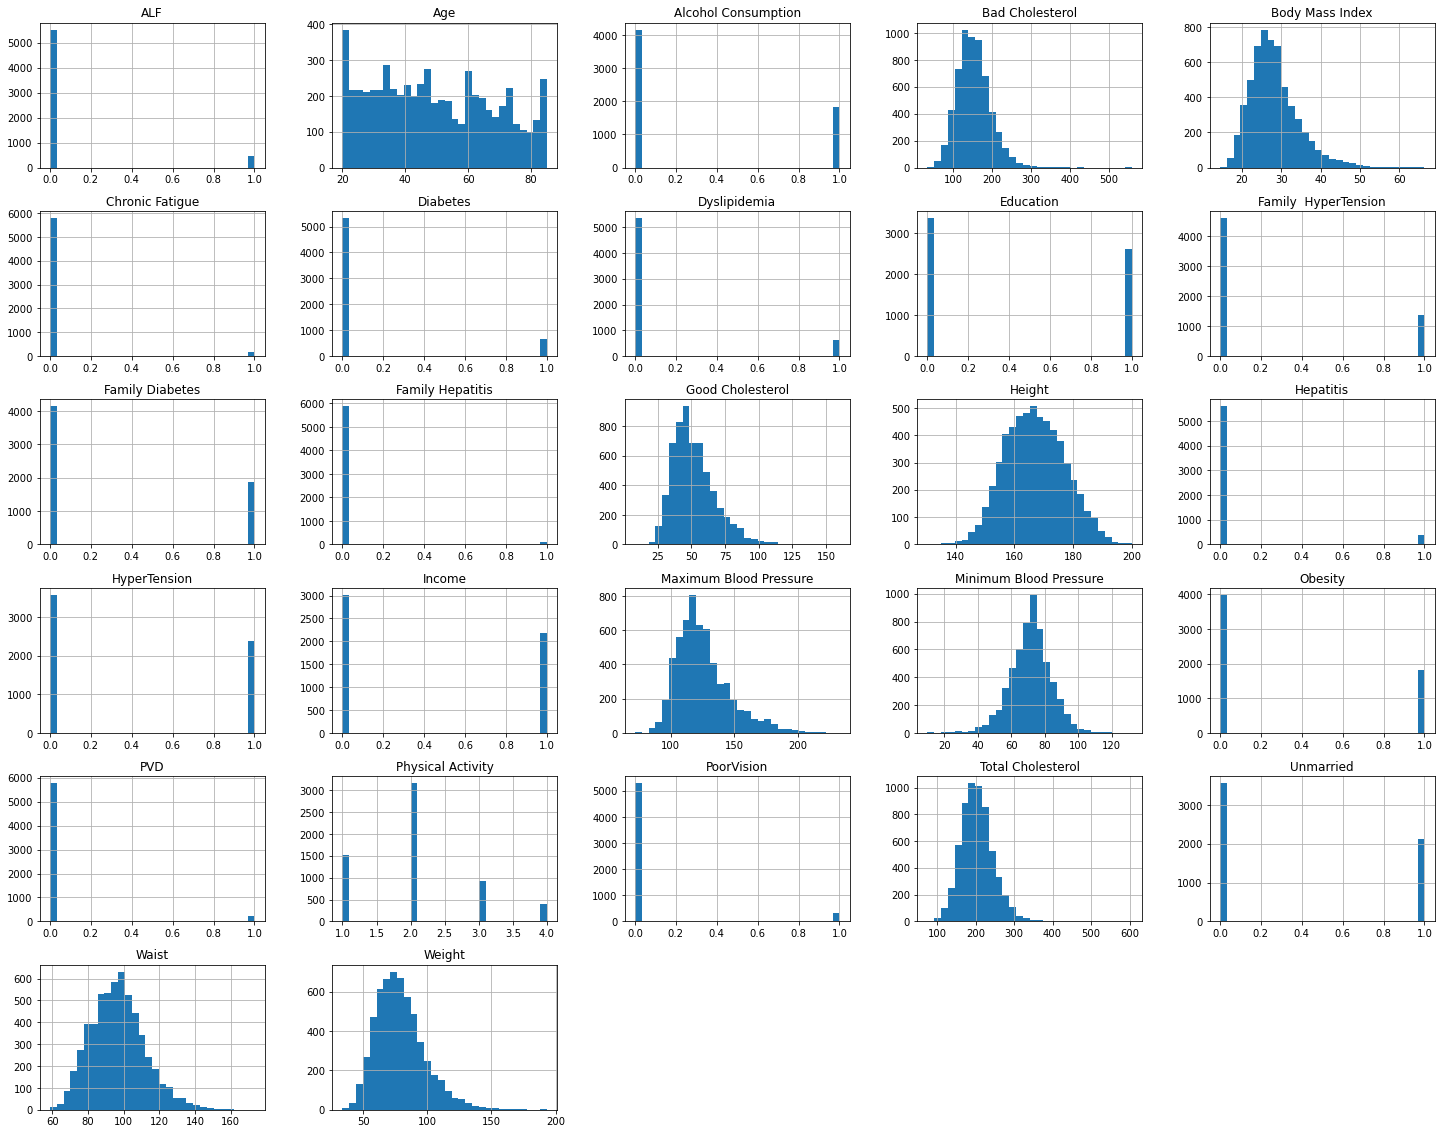

In [9]:
alf_df.hist(bins=30, figsize=(25, 20))

In [10]:
alf_df['Height'] = alf_df['Height'].fillna((alf_df['Height'].mean()))
alf_df['Minimum Blood Pressure'] = alf_df['Minimum Blood Pressure'].fillna((alf_df['Minimum Blood Pressure'].mean()))

- **karena kolom Height dan Minimum Blood Pressure memiliki distribusi normal saya mengisi missing value dengan menggunakan median dari datanya**

In [11]:
alf_df.isna().sum()

Age                         0
Gender                      0
Region                      0
Weight                    133
Height                      0
Body Mass Index           206
Obesity                   206
Waist                     215
Maximum Blood Pressure    206
Minimum Blood Pressure      0
Good Cholesterol            8
Bad Cholesterol             8
Total Cholesterol           6
Dyslipidemia                0
PVD                         0
Physical Activity           8
Education                  15
Unmarried                 301
Income                    792
Source of Care              0
PoorVision                376
Alcohol Consumption         0
HyperTension               53
Family  HyperTension        0
Diabetes                    1
Family Diabetes             0
Hepatitis                  13
Family Hepatitis            3
Chronic Fatigue            26
ALF                         0
dtype: int64

In [12]:
alf_df = alf_df.fillna(alf_df.median())

- **karena selain kolom Height dan Minimum Blood Pressure memiliki sebaran data yang tidak normal, maka saya mengisi missing aluenya dengan median dari data tersebut**

In [13]:
alf_df.isna().sum()

Age                       0
Gender                    0
Region                    0
Weight                    0
Height                    0
Body Mass Index           0
Obesity                   0
Waist                     0
Maximum Blood Pressure    0
Minimum Blood Pressure    0
Good Cholesterol          0
Bad Cholesterol           0
Total Cholesterol         0
Dyslipidemia              0
PVD                       0
Physical Activity         0
Education                 0
Unmarried                 0
Income                    0
Source of Care            0
PoorVision                0
Alcohol Consumption       0
HyperTension              0
Family  HyperTension      0
Diabetes                  0
Family Diabetes           0
Hepatitis                 0
Family Hepatitis          0
Chronic Fatigue           0
ALF                       0
dtype: int64

In [68]:
alf_df['Income'].value_counts()

0.0    3808
1.0    2192
Name: Income, dtype: int64

## EDA

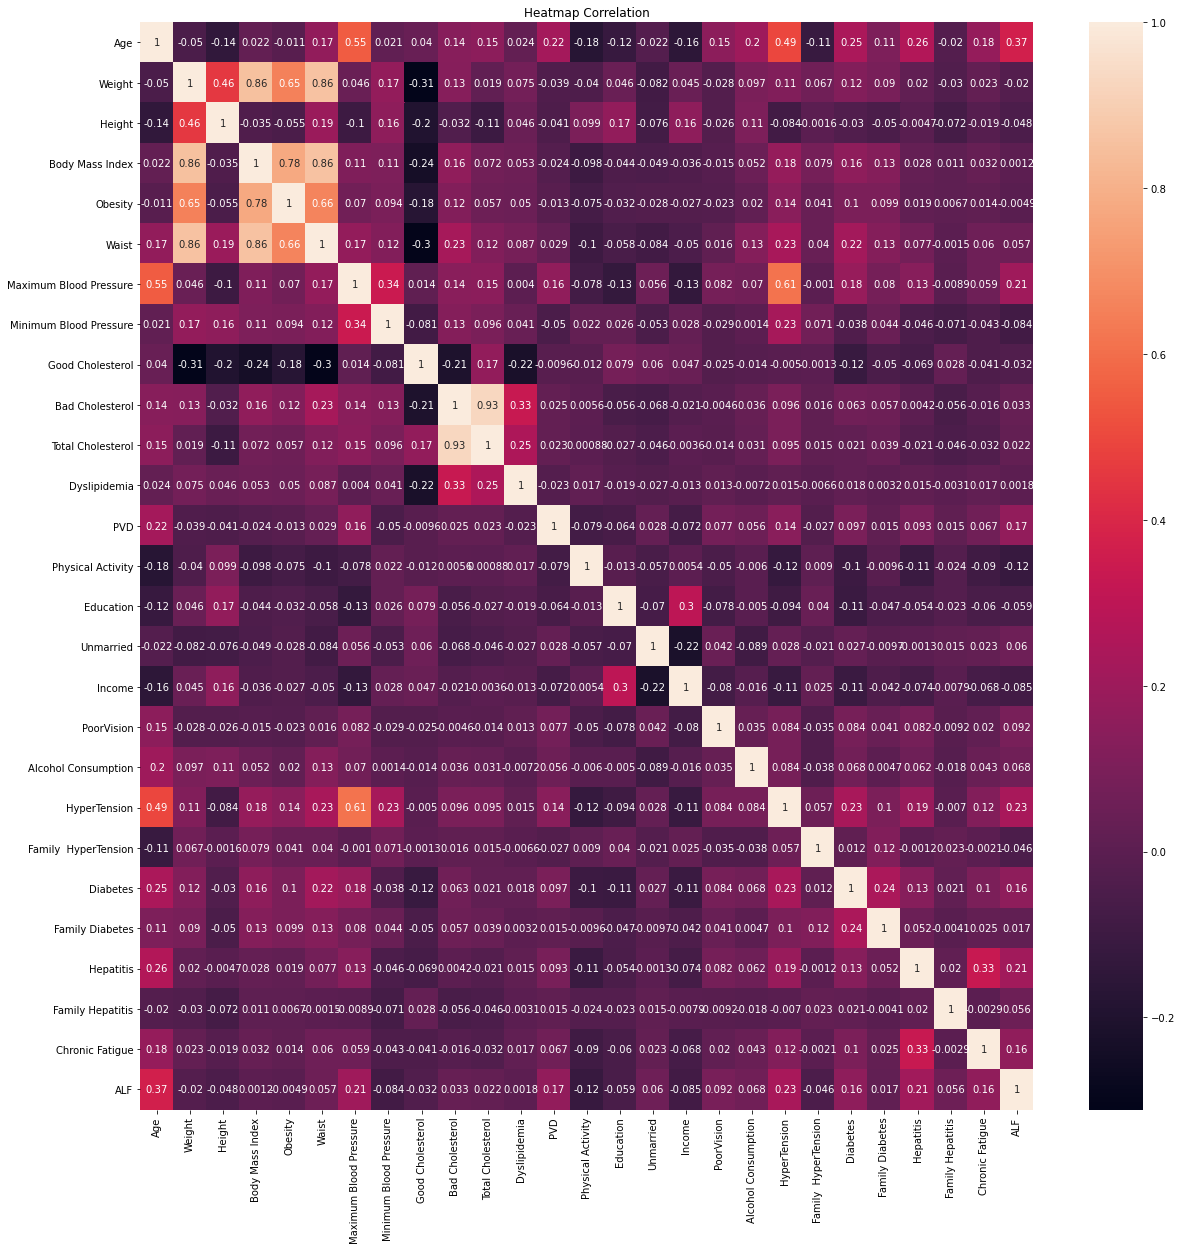

In [14]:
plt.figure(figsize = (20,20))
plt.title('Heatmap Correlation')
sns.heatmap(alf_df.corr(), annot = True)


In [15]:
alf_df['ALF'].value_counts()/alf_df.shape[0]*100

0.0    92.266667
1.0     7.733333
Name: ALF, dtype: float64

Data Imbalance :
- kelas ALF = 7.73%
- kelas not ALF = 92.27%

In [16]:
alf_df['Source of Care'].value_counts()

Private Hospital        3482
clinic                  1269
Never Counsulted         925
Governament Hospital     322
                           2
Name: Source of Care, dtype: int64

In [17]:
alf_df['Region'].value_counts()

east     2974
south    1758
north    1078
west      190
Name: Region, dtype: int64

In [18]:
alf_df['Gender'].value_counts()

M    3135
F    2865
Name: Gender, dtype: int64

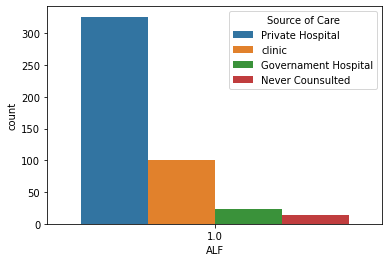

In [19]:
alf = alf_df[alf_df['ALF'] == 1]
sns.countplot(data = alf,x='ALF',hue='Source of Care')

**orang yang mengalami kegagalan hati akut paling banyak ditangani di rumah swasta**

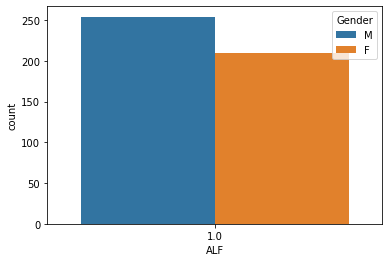

In [20]:
sns.countplot(data = alf,x='ALF',hue='Gender')

**orang yang mengalami kegagalan hati akut paling banyak yaitu yang berjenis kelamin laki-laki**

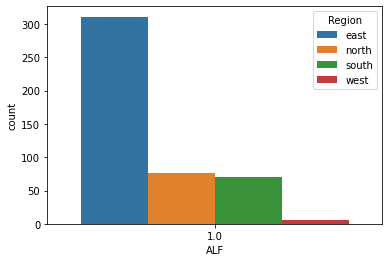

In [21]:
sns.countplot(data = alf,x='ALF',hue='Region')

**orang orang yang berasal dari wilayah timur merupakan orang yang paling banyak mengalami kegagalan hati akut paling banyak** 

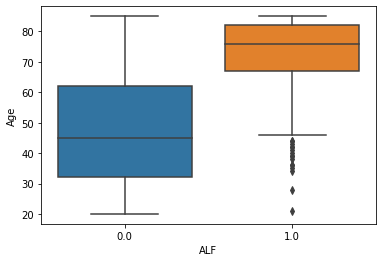

In [22]:
sns.boxplot(x = alf_df['ALF'], y = alf_df['Age'])

**orang orang yang berumur 65 tahun keatas cenderung mengalami kegagalan hati akut**

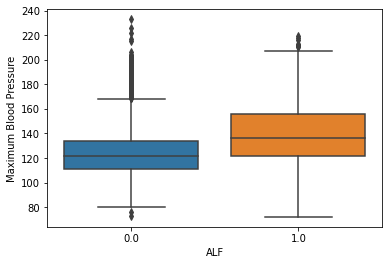

In [23]:
sns.boxplot(x = alf_df['ALF'], y = alf_df['Maximum Blood Pressure'])

**orang yang memiliki tekanan darah dengan maksimum angka diantara 130 sampai dengan 160 memiliki penyakit kegagalan hati akut**

## Preprocessing

In [24]:
alf_df = pd.get_dummies(alf_df, columns = ['Gender', 'Region', 'Source of Care'])

In [25]:
alf_df.head()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,Gender_M,Region_east,Region_north,Region_south,Region_west,Source of Care_,Source of Care_Governament Hospital,Source of Care_Never Counsulted,Source of Care_Private Hospital,Source of Care_clinic
0,65,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,...,1,1,0,0,0,0,1,0,0,0
1,36,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,...,1,0,0,1,0,0,0,1,0,0
2,66,83.9,162.5,31.77,1.0,113.2,115.0,57.0,44.0,211.0,...,1,1,0,0,0,0,0,1,0,0
3,54,69.4,160.5,26.94,0.0,77.9,110.0,57.0,74.0,156.0,...,1,1,0,0,0,0,0,0,1,0
4,63,73.1,159.2,28.84,0.0,89.3,132.0,73.0,67.0,154.0,...,1,0,1,0,0,0,0,0,0,1


In [64]:
alf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  6000 non-null   int64  
 1   Weight                               6000 non-null   float64
 2   Height                               6000 non-null   float64
 3   Body Mass Index                      6000 non-null   float64
 4   Obesity                              6000 non-null   float64
 5   Waist                                6000 non-null   float64
 6   Maximum Blood Pressure               6000 non-null   float64
 7   Minimum Blood Pressure               6000 non-null   float64
 8   Good Cholesterol                     6000 non-null   float64
 9   Bad Cholesterol                      6000 non-null   float64
 10  Total Cholesterol                    6000 non-null   float64
 11  Dyslipidemia                  

### Data Splitting

In [26]:
x = alf_df.drop(['ALF'],axis = 1)
y = alf_df['ALF']

In [27]:
x_train_val,x_test, y_train_val, y_test= train_test_split(x, y, stratify=y, test_size= 0.2, random_state=1899)

## Model Selection

### Resampling : SMOTE

In [28]:
smote=SMOTE()
logreg= LogisticRegression()
tree= DecisionTreeClassifier(max_depth=3)
knn= KNeighborsClassifier()

estimator_1= Pipeline([('balancing',smote),('model',logreg)])
estimator_2= Pipeline([('balancing',smote),('model',tree)])
estimator_3= Pipeline([('balancing',smote),('model',knn)])

In [29]:
skfold= StratifiedKFold(n_splits=5)

logreg_cv= cross_val_score(estimator_1, x_train_val,y_train_val, cv=skfold, scoring='f1')
tree_cv= cross_val_score(estimator_2, x_train_val, y_train_val, cv=skfold, scoring='f1')
knn_cv= cross_val_score(estimator_3, x_train_val,y_train_val, cv=skfold, scoring='f1')

In [30]:
print('cv score:', logreg_cv)
print('cv score mean', logreg_cv.mean())

cv score: [0.42060086 0.3826087  0.35874439 0.33333333 0.3876652 ]
cv score mean 0.3765904960422651


In [31]:
print('cv score:', tree_cv)
print('cv score mean', tree_cv.mean())

cv score: [0.36036036 0.35416667 0.35606061 0.4140625  0.35986159]
cv score mean 0.368902344956627


In [32]:
print('cv score:', knn_cv)
print('cv score mean', knn_cv.mean())

cv score: [0.27956989 0.29681979 0.36486486 0.31972789 0.32323232]
cv score mean 0.316842951942527


### Algo Based: Penalized

In [33]:
model= LogisticRegression(class_weight='balanced')
skfold= StratifiedKFold(n_splits=5)
model_cv=cross_val_score(model, x_train_val,y_train_val,cv=skfold,scoring='f1')

In [34]:
print('cv score:', model_cv)
print('cv score mean', model_cv.mean())

cv score: [0.37974684 0.35465116 0.37267081 0.36795252 0.37538462]
cv score mean 0.370081188665392


**setelah dilakukan sampling dengan menggunakan kedua model diatas, model terbaik untuk dataset yang digunakan menurut saya yaitu dengan menggunakan model Logistic regression dan saya melakukan balancing dataset dengan menggunakan metode resampling menggunakan _Smote_**

## Hyperparameter Tunning

In [35]:
smote= SMOTE(random_state=1899)
model= LogisticRegression()
estimator= Pipeline([('balancing',smote),('model',model)])

In [36]:
hyperparam_space={
    'balancing__k_neighbors':[2,5,10,15,20],
    'model__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'model__solver':['liblinear','newton-cg']
}

skfold=StratifiedKFold(n_splits=5)

In [39]:
grid=GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='f1',
    n_jobs=-1
)

In [40]:
grid.fit(x_train_val,y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('balancing', SMOTE(random_state=1899)),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'balancing__k_neighbors': [2, 5, 10, 15, 20],
                         'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'model__solver': ['liblinear', 'newton-cg']},
             scoring='f1')

In [41]:
print('best score', grid.best_score_)
print('best param', grid.best_params_)

best score 0.4355501380252388
best param {'balancing__k_neighbors': 2, 'model__C': 0.1, 'model__solver': 'newton-cg'}


### Befor Tunning

In [42]:
smote= SMOTE(random_state=1899)
model= LogisticRegression()
estimator= Pipeline([('balancing',smote),('model',model)])

In [43]:
estimator.fit(x_train_val,y_train_val)
y_pred= estimator.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.89      0.93      1107
         1.0       0.32      0.60      0.42        93

    accuracy                           0.87      1200
   macro avg       0.64      0.75      0.67      1200
weighted avg       0.91      0.87      0.89      1200



### After Tunning

In [45]:
grid.best_estimator_.fit(x_train_val,y_train_val)
y_pred=grid.best_estimator_.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1107
         1.0       0.41      0.53      0.46        93

    accuracy                           0.91      1200
   macro avg       0.69      0.73      0.71      1200
weighted avg       0.92      0.91      0.91      1200



**setelah dilakukakn hyperparameter tunning perfrma model meningkat dari 0.42 menjadi 0.46**

## Deployment

In [52]:
import pickle
import joblib

In [53]:
grid.best_estimator_.fit(x,y)

file_name = 'Model Final.sav'

pickle.dump(grid.best_estimator_,open(file_name,'wb'))

## Predict With Saved Model

In [54]:
loaded_model = pickle.load(open(file_name,'rb'))

In [55]:
loaded_model.predict(x_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [65]:
alf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  6000 non-null   int64  
 1   Weight                               6000 non-null   float64
 2   Height                               6000 non-null   float64
 3   Body Mass Index                      6000 non-null   float64
 4   Obesity                              6000 non-null   float64
 5   Waist                                6000 non-null   float64
 6   Maximum Blood Pressure               6000 non-null   float64
 7   Minimum Blood Pressure               6000 non-null   float64
 8   Good Cholesterol                     6000 non-null   float64
 9   Bad Cholesterol                      6000 non-null   float64
 10  Total Cholesterol                    6000 non-null   float64
 11  Dyslipidemia                  

In [69]:
df_predict= pd.DataFrame({
    'Age' : [60],
    'Weight' : [75],
    'Height' : [170],
    'Body Mass Index' : [30],
    'Obesity' : [1],
    'Waist' : [60],
    'Maximum Blood Pressure' : [146],
    'Minimum Blood Pressure' : [80],
    'Good Cholesterol' : [70],
    'Bad Cholesterol' : [140],
    'Total Cholesterol' : [210],
    'Dyslipidemia' : [1],
    'PVD' : [1],
    'Physical Activity' : [2],
    'Education' : [1],
    'Unmarried' : [1],
    'Income' : [1],
    'PoorVision' : [1],
    'Alcohol Consumption' : [1],
    'HyperTension' : [1],
    'Family  HyperTension' : [0],
    'Diabetes' : [0],
    'Family Diabetes' : [1],
    'Hepatitis' : [0],
    'Family Hepatitis' : [1],
    'Chronic Fatigue' : [0],
    'Gender_F' : [0],
    'Gender_M' : [1],
    'Region_east' : [1],
    'Region_north' : [0],
    'Region_south' : [0],
    'Region_west' : [0],
    'Source of Care_' : [0],
    'Source of Care_Governament Hospital' : [0],
    'Source of Care_Never Counsulted' : [1],
    'Source of Care_Private Hospital' : [0],
    'Source of Care_clinic' : [0] 
})
 

In [70]:
df_predict

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,Gender_M,Region_east,Region_north,Region_south,Region_west,Source of Care_,Source of Care_Governament Hospital,Source of Care_Never Counsulted,Source of Care_Private Hospital,Source of Care_clinic
0,60,75,170,30,1,60,146,80,70,140,...,1,1,0,0,0,0,0,1,0,0


In [71]:
loaded_model.predict(df_predict)

array([0.])